Mean hits per game for left-handed batters: 0.7486181972054805
Mean hits per game for right-handed batters: 0.7465635464536055
Mean hits per game for switch-hitters: 0.7683785674704149


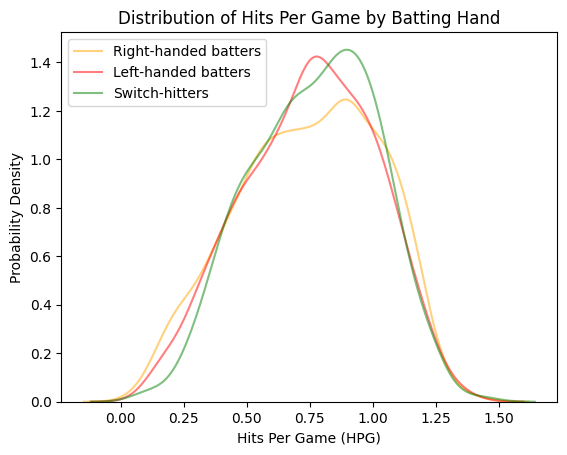

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

people = pd.read_csv('baseball/core/People.csv')
batting = pd.read_csv('baseball/core/Batting.csv')
batting['batAvg'] = batting.H/batting.AB
batting['hitsPerGame'] = batting.H/batting.G
playerHits = pd.merge(people, batting, on='playerID')

# Only include data from 2010 and beyond
recentPlayersAndBatting = playerHits[playerHits['yearID'] >= 2010]
# Only count players who went up to bat at least 50 times
recentPlayersAndBatting = recentPlayersAndBatting[recentPlayersAndBatting['AB'] >= 50]

recentPlayersAndBattingL = recentPlayersAndBatting[recentPlayersAndBatting['bats'] == 'L']
recentPlayersAndBattingR = recentPlayersAndBatting[recentPlayersAndBatting['bats'] == 'R']
recentPlayersAndBattingB = recentPlayersAndBatting[recentPlayersAndBatting['bats'] == 'B']
print(f"Mean hits per game for left-handed batters: {recentPlayersAndBattingL['hitsPerGame'].mean()}")
print(f"Mean hits per game for right-handed batters: {recentPlayersAndBattingR['hitsPerGame'].mean()}")
print(f"Mean hits per game for switch-hitters: {recentPlayersAndBattingB['hitsPerGame'].mean()}")

sns.kdeplot(data=recentPlayersAndBattingR, x='hitsPerGame', label='Right-handed batters', color='orange', alpha=0.5)
sns.kdeplot(data=recentPlayersAndBattingL, x='hitsPerGame', label='Left-handed batters', color='red', alpha=0.5)
sns.kdeplot(data=recentPlayersAndBattingB, x='hitsPerGame', label='Switch-hitters', color='green', alpha=0.5)

plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Distribution of Hits Per Game by Batting Hand')
plt.legend()
plt.show()

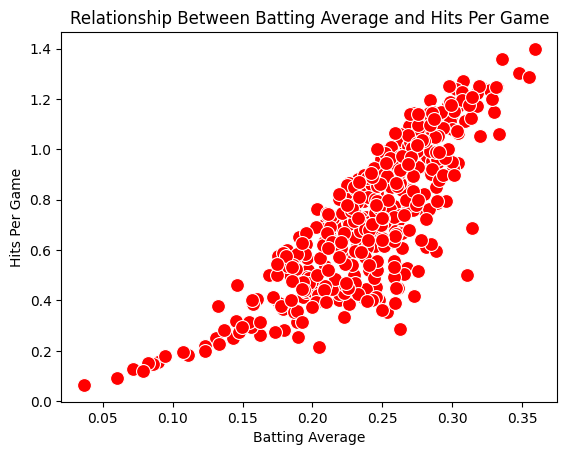

In [24]:
sns.scatterplot(x='batAvg', y='hitsPerGame', data=recentPlayersAndBatting.sample(frac=.1), s=100, color='red')
plt.title('Relationship Between Batting Average and Hits Per Game')
plt.xlabel('Batting Average')
plt.ylabel('Hits Per Game')
plt.show()

Mean hits per game for first names of at least 6 letters: 0.7889016156067957
Mean hits per game for first names of 5 or fewer letters: 0.7275696626309643


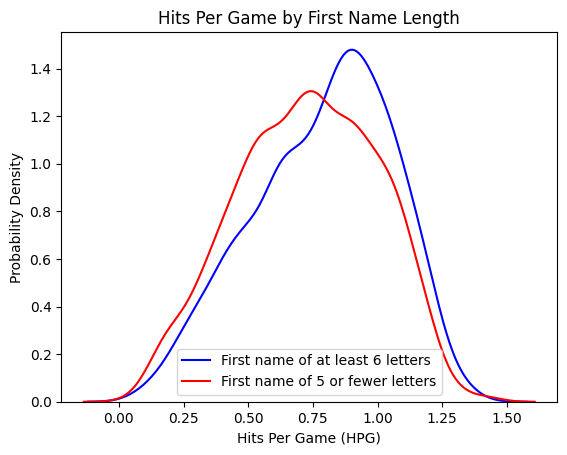

In [25]:
longFirst = recentPlayersAndBatting[recentPlayersAndBatting['nameFirst'].apply(len) >= 6]
shortFirst = recentPlayersAndBatting[recentPlayersAndBatting['nameFirst'].apply(len) < 6]

print(f"Mean hits per game for first names of at least 6 letters: {longFirst['hitsPerGame'].mean()}")
print(f"Mean hits per game for first names of 5 or fewer letters: {shortFirst['hitsPerGame'].mean()}")

sns.kdeplot(data=longFirst, x='hitsPerGame', label='First name of at least 6 letters', color='blue')
sns.kdeplot(data=shortFirst, x='hitsPerGame', label='First name of 5 or fewer letters', color='red')

plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by First Name Length')
plt.legend()
plt.show()

Mean hits per game for last names of at least 7 letters: 0.7470891695173512
Mean hits per game for last names of 6 or fewer letters: 0.752872910499189


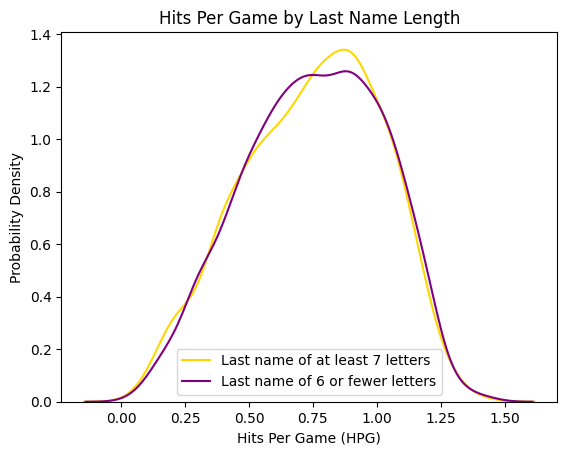

In [26]:
longLast = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) >= 7]
shortLast = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) < 7]

print(f"Mean hits per game for last names of at least 7 letters: {longLast['hitsPerGame'].mean()}")
print(f"Mean hits per game for last names of 6 or fewer letters: {shortLast['hitsPerGame'].mean()}")

sns.kdeplot(data=longLast, x='hitsPerGame', label='Last name of at least 7 letters', color='gold')
sns.kdeplot(data=shortLast, x='hitsPerGame', label='Last name of 6 or fewer letters', color='purple')

plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by Last Name Length')
plt.legend()
plt.show()

Mean hits per game for combined names of at least 12 letters: 0.7654766354498603
Mean hits per game for combined names of 11 or fewer letters: 0.734364820737043


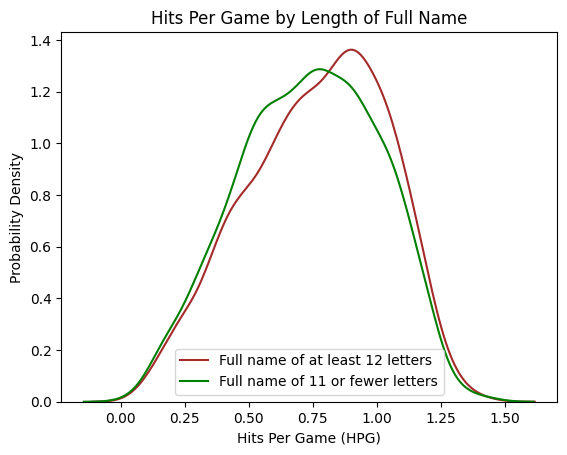

In [28]:
longCombined = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) + recentPlayersAndBatting['nameFirst'].apply(len) >= 12]
shortCombined = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) + recentPlayersAndBatting['nameFirst'].apply(len) < 12]

print(f"Mean hits per game for combined names of at least 12 letters: {longCombined['hitsPerGame'].mean()}")
print(f"Mean hits per game for combined names of 11 or fewer letters: {shortCombined['hitsPerGame'].mean()}")

sns.kdeplot(data=longCombined, x='hitsPerGame', label='Full name of at least 12 letters', color='brown')
sns.kdeplot(data=shortCombined, x='hitsPerGame', label='Full name of 11 or fewer letters', color='green')

plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by Length of Full Name')
plt.legend()
plt.show()